<a href="https://colab.research.google.com/github/hetpatel007/GIS-1/blob/main/ps_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Research Interest**


In this Project ,
1) I am working to map to correlation between literacy rate and unemployment rate accross states in India
2) Relation between income and literacy rate accross states

## **Libraries**

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

## mapping your area of interest

*   In the code we found the zip file ,unzipped it and found the shape file of india ,after which we plot it.

In [ ]:
! wget -q -O GIS_INDIA_MAP.zip https://drive.google.com/uc?id=1BHlY3nu1CY1eg0ULpvQDbYobmXMQaB9N&export=download
zip_ref = zipfile.ZipFile('GIS_INDIA_MAP.zip', 'r'); zip_ref.extractall(); zip_ref.close()

In [ ]:
Ind = gpd.read_file('India States/Indian_states.shp')

<Axes: >

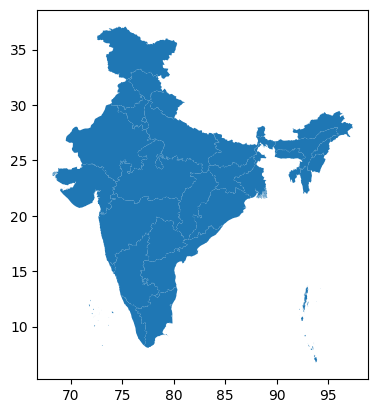

In [ ]:
Ind.plot()

# **Data Types and columns in the shapefile**

In [ ]:
Ind.dtypes

st_nm         object
geometry    geometry
dtype: object

In [ ]:
import pandas as pd
# Rename columns using the rename() method
Ind = Ind.rename(columns={'st_nm': 'State'})

In [ ]:
Ind.dtypes

State         object
geometry    geometry
dtype: object

In [ ]:
Ind['State'].count()

36

In [ ]:
print(Ind['State'])

0     Andaman & Nicobar Island
1           Arunanchal Pradesh
2                        Assam
3                        Bihar
4                   Chandigarh
5                 Chhattisgarh
6       Dadara & Nagar Havelli
7                  Daman & Diu
8                          Goa
9                      Gujarat
10                     Haryana
11            Himachal Pradesh
12             Jammu & Kashmir
13                   Jharkhand
14                   Karnataka
15                      Kerala
16                 Lakshadweep
17              Madhya Pradesh
18                 Maharashtra
19                     Manipur
20                   Meghalaya
21                     Mizoram
22                    Nagaland
23                NCT of Delhi
24                  Puducherry
25                      Punjab
26                   Rajasthan
27                      Sikkim
28                  Tamil Nadu
29                   Telangana
30                     Tripura
31               Uttar Pradesh
32      

## Unemployment in India
Map 1

In [ ]:
! wget -q -O up_df.csv https://drive.google.com/uc?id=1o3dQsYfZzpAA0-gBOW3b32Evh3vjFP5d&export=download


In [ ]:
df_unemp = pd.read_csv("up_df.csv")

In [ ]:
df_unemp.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df_unemp.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [ ]:
df_unemp=df_unemp.rename(columns={'Region':'State'})

In [ ]:
df_unemp['State'].nunique()

28

In [ ]:
df_un_1 = df_unemp[['State',' Estimated Unemployment Rate (%)','Area']]     #Managing duplicates
df_un_1.head()

,State,Estimated Unemployment Rate (%),Area
0,Andhra Pradesh,3.65,Rural
1,Andhra Pradesh,3.05,Rural
2,Andhra Pradesh,3.75,Rural
3,Andhra Pradesh,3.32,Rural
4,Andhra Pradesh,5.17,Rural


In [ ]:
df_un_agg=df_un_1.groupby(['State','Area'])[' Estimated Unemployment Rate (%)'].mean().reset_index()
df_un_agg.head()


,State,Area,Estimated Unemployment Rate (%)
0,Andhra Pradesh,Rural,5.526429
1,Andhra Pradesh,Urban,9.427857
2,Assam,Rural,4.490833
3,Assam,Urban,8.088571
4,Bihar,Rural,16.770000


In [ ]:
#merge
#njC1 = pd.merge(njC, zil1, on='COUNTY',how='outer',indicator=True)
df_1 = pd.merge(Ind, df_un_agg, on='State',how='outer',indicator=True)

In [ ]:
df_2 = pd.merge(Ind, df_un_agg, on='State',how='inner',indicator=False)

In [ ]:
df_1.dtypes

State                                 object
geometry                            geometry
Area                                  object
 Estimated Unemployment Rate (%)     float64
_merge                              category
dtype: object

## Took relevant columns

In [ ]:
df_1 = df_1[['State',' Estimated Unemployment Rate (%)','Area','_merge','geometry']]

In [ ]:
df_1 = df_1.iloc[2:]

In [ ]:
df_1.shape

(62, 5)

<Axes: >

[]

[]

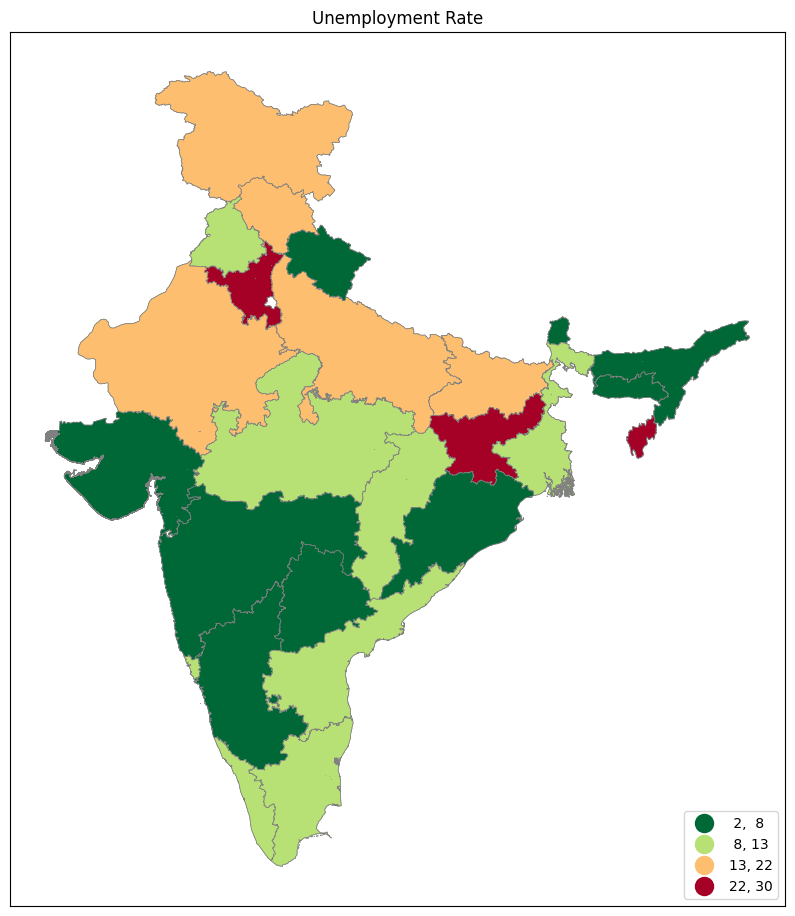

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
df_1.plot(ax=ax,column=' Estimated Unemployment Rate (%)',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Unemployment Rate")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

##MAP 2
Literacy rate

In [ ]:
! wget -q -O lit_df.csv "https://drive.google.com/uc?id=1o9gOvKIMbAIKk5HBHGfBPh3DY617TiEW&export=download"

In [ ]:
df_literacy = pd.read_csv("lit_df.csv")

In [ ]:
df_literacy.head()

,Category,Country/ States/ Union Territories Name,Literacy Rate (Persons) - Total - 2019,Literacy Rate (Persons) - Total - 2019.1,Literacy Rate (Persons) - Rural - 2019,Literacy Rate (Persons) - Rural - 2019.1,Literacy Rate (Persons) - Urban - 2019,Literacy Rate (Persons) - Urban - 2019.1
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9


In [ ]:
df_literacy.dtypes

Category                                     object
Country/ States/ Union Territories Name      object
Literacy Rate (Persons) - Total - 2019      float64
Literacy Rate (Persons) - Total - 2019.1    float64
Literacy Rate (Persons) - Rural - 2019      float64
Literacy Rate (Persons) - Rural - 2019.1    float64
Literacy Rate (Persons) - Urban - 2019      float64
Literacy Rate (Persons) - Urban - 2019.1    float64
dtype: object

In [ ]:
df_literacy.rename(columns= {'Country/ States/ Union Territories Name' : 'State','Literacy Rate (Persons) - Total - 2019' : 'Literacy_rate','Literacy Rate (Persons) - Rural - 2019': 'Literacy Rural','Literacy Rate (Persons) - Urban - 2019':'Literacy Urban'}, inplace=True)
df_literacy.head(10)

,Category,State,Literacy_rate,Literacy Rate (Persons) - Total - 2019.1,Literacy Rural,Literacy Rate (Persons) - Rural - 2019.1,Literacy Urban,Literacy Rate (Persons) - Urban - 2019.1
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9
5,State,Chhattisgarh,64.7,70.3,60.5,66.0,80.6,84.0
6,State,Goa,82.0,88.7,79.7,86.6,84.4,90.0
7,State,Gujarat,69.1,78.0,61.3,71.7,81.8,86.3
8,State,Haryana,67.9,75.6,63.2,71.4,79.2,83.1
9,State,Himachal Pradesh,76.5,82.8,75.1,81.9,88.9,91.1


In [ ]:
df_literacy = df_literacy.drop(df_literacy.index[0])

In [ ]:
df_literacy.head(3)

,Category,State,Literacy_rate,Literacy Rate (Persons) - Total - 2019.1,Literacy Rural,Literacy Rate (Persons) - Rural - 2019.1,Literacy Urban,Literacy Rate (Persons) - Urban - 2019.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5


In [ ]:
Literacy_df = pd.merge(Ind,df_literacy, on='State',how='outer',indicator=True)
#print(C1.columns)

In [ ]:
Literacy_df_2 = pd.merge(Ind,df_literacy, on='State',how='inner',indicator=False)

In [ ]:
Literacy_df = Literacy_df[['State','Literacy_rate','geometry','_merge','Literacy Rural','Literacy Urban']]

In [ ]:
Literacy_df.shape

(39, 6)

<Axes: >

[]

[]

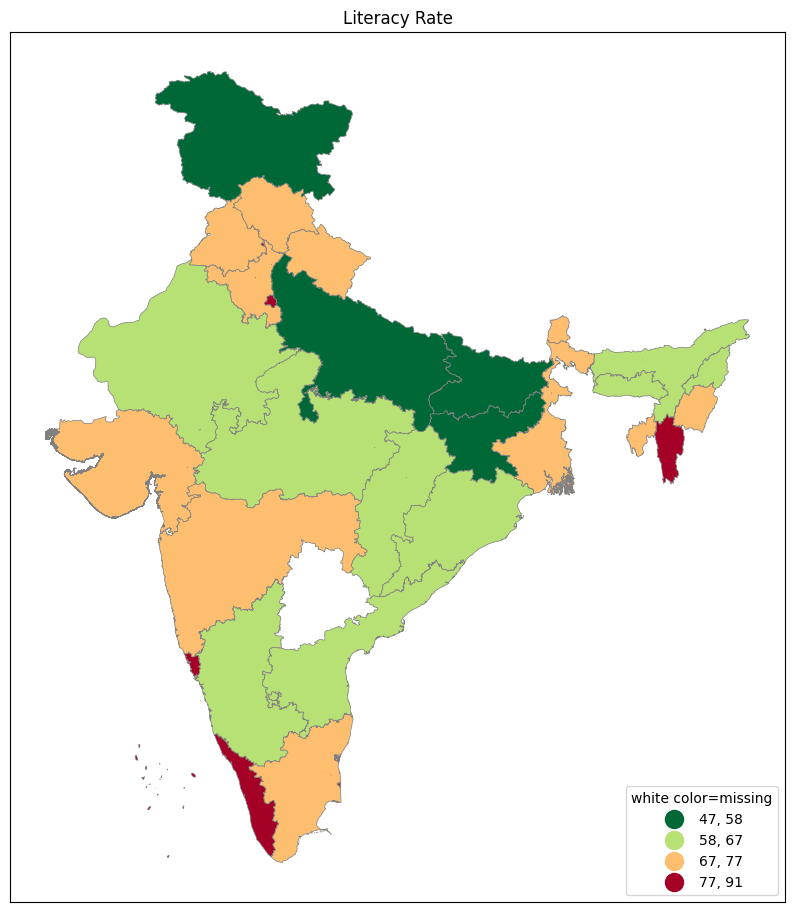

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
Literacy_df.plot(ax=ax,column='Literacy_rate',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Literacy Rate")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

### SIDE BY SIDE###

<Axes: >

[]

[]

<Axes: >

[]

[]

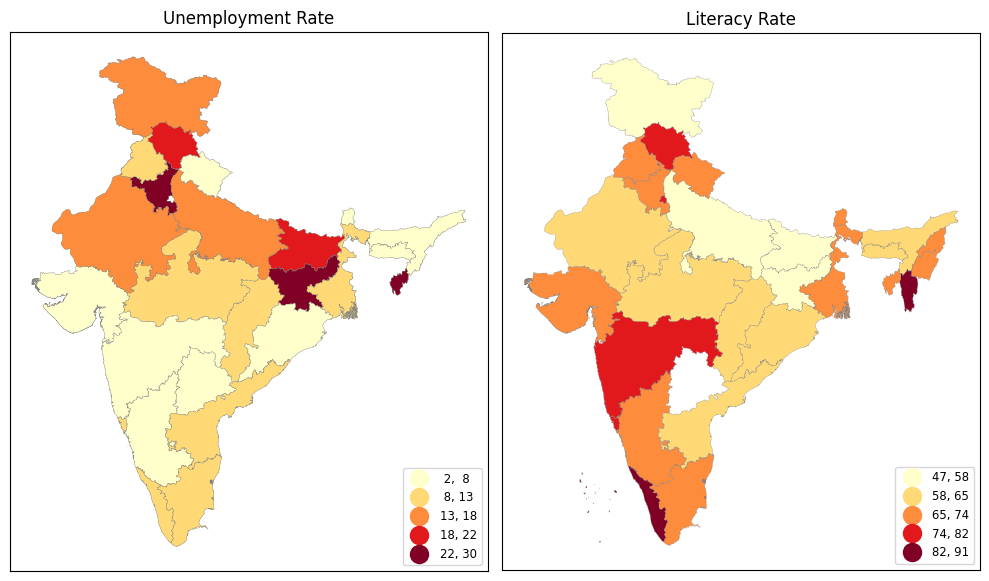

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
df_1.plot(ax=axs[0],column=' Estimated Unemployment Rate (%)',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment Rate")
axs[0].set_xticks([]); axs[0].set_yticks([])

Literacy_df.plot(ax=axs[1],column='Literacy_rate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Literacy Rate")
axs[1].set_xticks([]); axs[1].set_yticks([])


**By plotting both the maps we were able to discover correlation between literacy rate and unemployment. Majority of States with higher literacy has a lower unemployment rate and vice versa.**


### Map 3

##I tried to perform analysis in rural and urban areas

In [ ]:
df_un_agg.head()

,State,Area,Estimated Unemployment Rate (%)
0,Andhra Pradesh,Rural,5.526429
1,Andhra Pradesh,Urban,9.427857
2,Assam,Rural,4.490833
3,Assam,Urban,8.088571
4,Bihar,Rural,16.770000


In [ ]:
import pandas as pd
# Group by the 'column_name' column
grouped_df = df_un_agg.groupby('Area')

# Perform aggregation on the grouped data, for example, sum of 'value' for each group
sum_by_group = grouped_df[' Estimated Unemployment Rate (%)'].sum()

# Display the result
print(sum_by_group)


Area
Rural    274.453293
Urban    368.756015
Name:  Estimated Unemployment Rate (%), dtype: float64


Unemployment Rate was higher in Urban areas compared to Rural areas

### Group BY

In [ ]:
df_un_agg.dtypes

State                                object
Area                                 object
 Estimated Unemployment Rate (%)    float64
dtype: object

In [ ]:
import pandas as pd                                                         # Plot it
# Group by 'State' and calculate the mean of 'Estimated Unemployment Rate (%)'
grouped = df_un_agg.groupby('State')[' Estimated Unemployment Rate (%)'].sum()

print(grouped)


State
Andhra Pradesh      14.954286
Assam               12.579405
Bihar               37.836429
Chandigarh          15.991667
Chhattisgarh        18.480714
Delhi               32.990714
Goa                 18.548333
Gujarat             13.327857
Haryana             52.566429
Himachal Pradesh    37.080714
Jammu & Kashmir     32.500818
Jharkhand           41.170000
Karnataka           13.352143
Kerala              20.247857
Madhya Pradesh      14.812857
Maharashtra         15.115000
Meghalaya            9.776538
Odisha              11.315714
Puducherry          20.008333
Punjab              24.062143
Rajasthan           28.116429
Sikkim              13.233333
Tamil Nadu          18.568571
Telangana           15.475714
Tripura             56.700714
Uttar Pradesh       25.102857
Uttarakhand         13.044451
West Bengal         16.249286
Name:  Estimated Unemployment Rate (%), dtype: float64


In [ ]:
# Find the maximum and minimum values and their corresponding states
max_value = grouped.max()
max_state = grouped.idxmax()

min_value = grouped.min()
min_state = grouped.idxmin()

print("Maximum value:", max_value, "in state:", max_state)
print("Minimum value:", min_value, "in state:", min_state)

Maximum value: 56.700714285714284 in state: Tripura
Minimum value: 9.776538461538461 in state: Meghalaya


### Only wanted values containing rural

In [ ]:
import pandas as pd
# Define the value you want to filter by
desired_value = 'Rural'

# Create a boolean condition for filtering
condition = df_un_agg['Area'] == desired_value

# Apply boolean indexing to obtain the subset
Rural_df = df_un_agg[condition]

print(Rural_df)


               State   Area   Estimated Unemployment Rate (%)
0     Andhra Pradesh  Rural                          5.526429
2              Assam  Rural                          4.490833
4              Bihar  Rural                         16.770000
7       Chhattisgarh  Rural                          6.628571
9              Delhi  Rural                         15.258571
11               Goa  Rural                          8.390000
13           Gujarat  Rural                          5.917143
15           Haryana  Rural                         25.012857
17  Himachal Pradesh  Rural                         15.504286
19   Jammu & Kashmir  Rural                         14.951818
21         Jharkhand  Rural                         15.221429
23         Karnataka  Rural                          7.224286
25            Kerala  Rural                         10.341429
27    Madhya Pradesh  Rural                          5.653571
29       Maharashtra  Rural                          6.810000
31      

In [ ]:
Rural_df.head()

,State,Area,Estimated Unemployment Rate (%)
0,Andhra Pradesh,Rural,5.526429
2,Assam,Rural,4.490833
4,Bihar,Rural,16.770000
7,Chhattisgarh,Rural,6.628571
9,Delhi,Rural,15.258571


In [ ]:
import pandas as pd
# Define the value you want to check for
desired_value = 'Urban'

# Create a boolean condition for checking
is_value_present = Rural_df['Area'].str.contains(desired_value, case=False)

# Check if the value is present in the column
if is_value_present.any():
    print(f'The value {desired_value} is present in the column.')
else:
    print(f'The value {desired_value} is not present in the column.')


The value Urban is not present in the column.


In [ ]:
import pandas as pd
# Define the value you want to filter by
desired_value = 'Urban'

# Create a boolean condition for filtering
condition = df_un_agg['Area'] == desired_value

# Apply boolean indexing to obtain the subset
Urban_df = df_un_agg[condition]

print(Urban_df)


               State   Area   Estimated Unemployment Rate (%)
1     Andhra Pradesh  Urban                          9.427857
3              Assam  Urban                          8.088571
5              Bihar  Urban                         21.066429
6         Chandigarh  Urban                         15.991667
8       Chhattisgarh  Urban                         11.852143
10             Delhi  Urban                         17.732143
12               Goa  Urban                         10.158333
14           Gujarat  Urban                          7.410714
16           Haryana  Urban                         27.553571
18  Himachal Pradesh  Urban                         21.576429
20   Jammu & Kashmir  Urban                         17.549000
22         Jharkhand  Urban                         25.948571
24         Karnataka  Urban                          6.127857
26            Kerala  Urban                          9.906429
28    Madhya Pradesh  Urban                          9.159286
30      

### Merge with shp file

In [ ]:
Rural_df_1 = pd.merge(Ind,Rural_df, on='State',how='outer',indicator=True)


<Axes: >

[]

[]

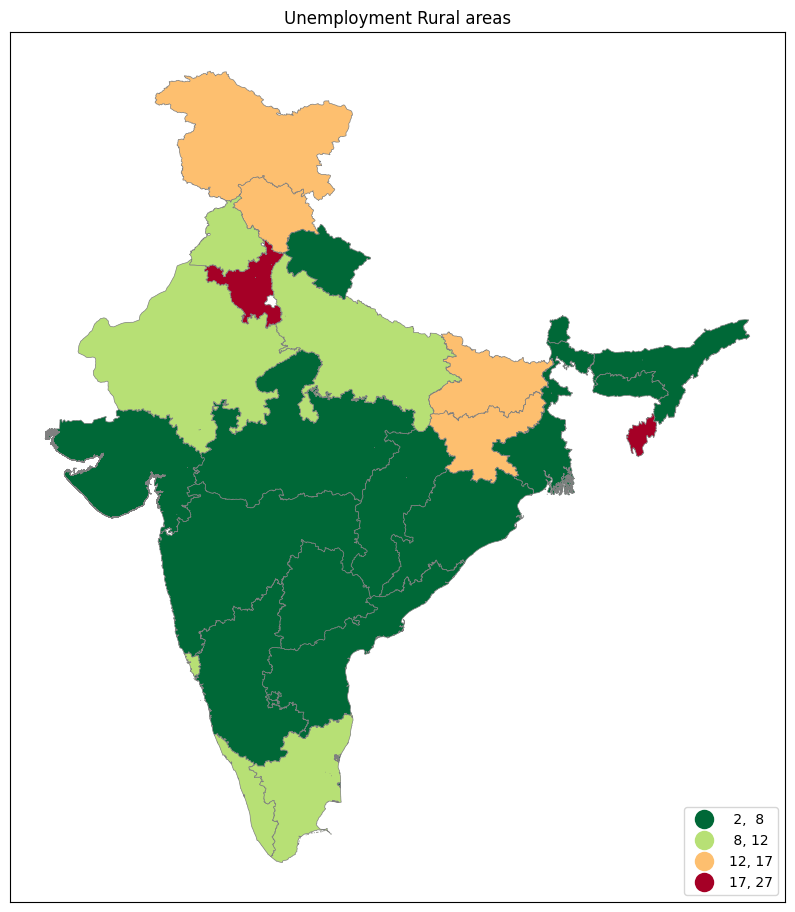

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
Rural_df_1.plot(ax=ax,column=' Estimated Unemployment Rate (%)',legend=True,cmap='RdYlGn_r',
          scheme='naturalbreaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Unemployment Rural areas")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks



In [ ]:
Urban_df_1 = pd.merge(Ind, Urban_df, on='State',how='outer',indicator=True)

<Axes: >

[]

[]

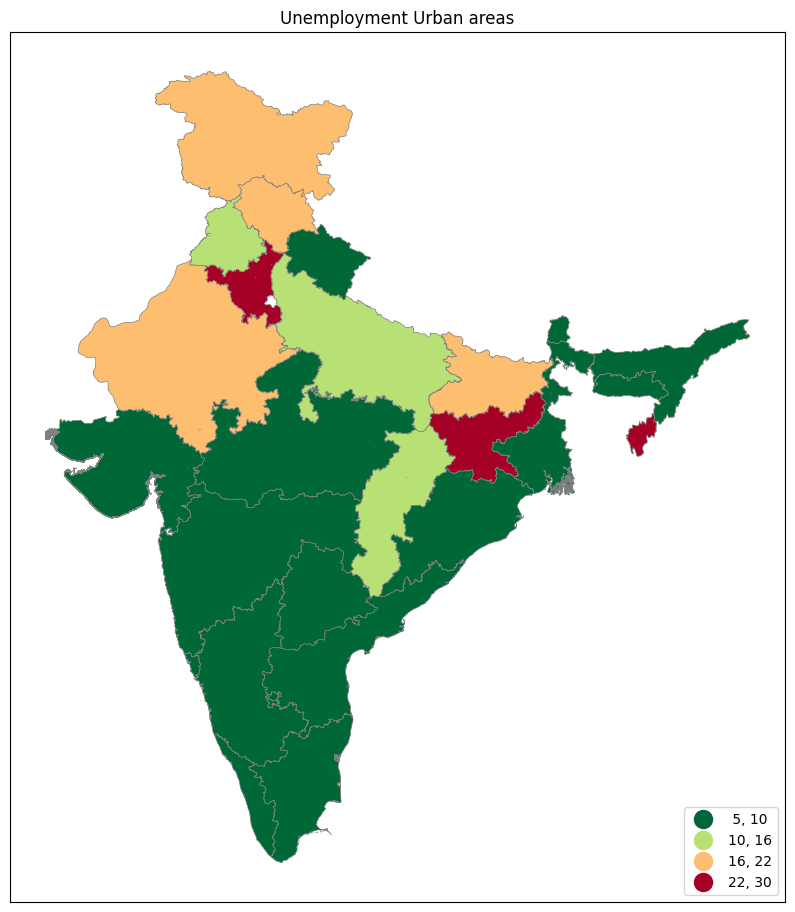

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
Urban_df_1.plot(ax=ax,column=' Estimated Unemployment Rate (%)',legend=True,cmap='RdYlGn_r',
          scheme='naturalbreaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Unemployment Urban areas")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


<Axes: >

[]

[]

<Axes: >

[]

[]

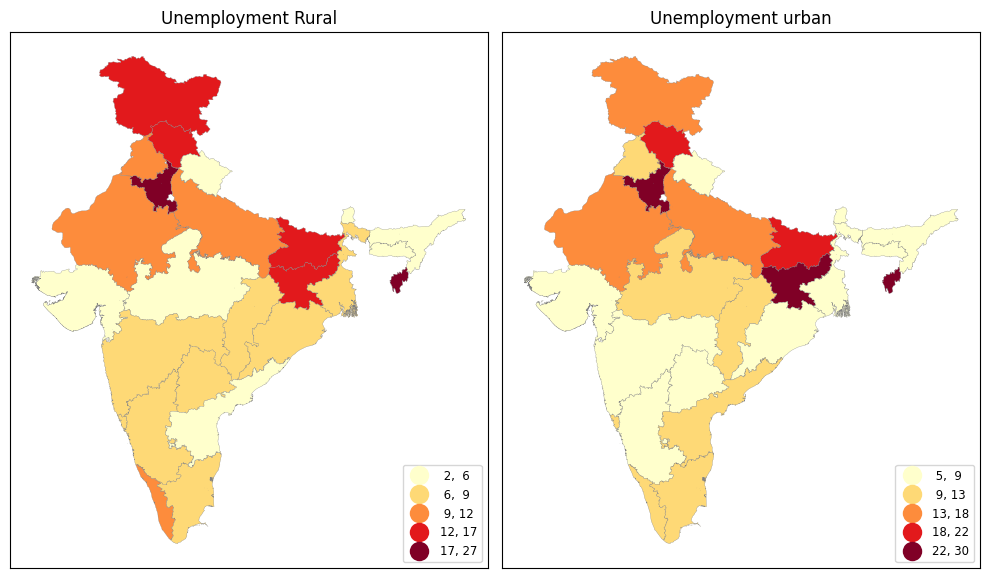

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
Rural_df_1.plot(ax=axs[0],column=' Estimated Unemployment Rate (%)',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment Rural")
axs[0].set_xticks([]); axs[0].set_yticks([])

Urban_df_1.plot(ax=axs[1],column=' Estimated Unemployment Rate (%)',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Unemployment urban")
axs[1].set_xticks([]); axs[1].set_yticks([])

By the Map we could infer unemployment is higher in urban compared to rural areas

### MAP 4

In [ ]:
Literacy_df.dtypes

State               object
Literacy_rate      float64
geometry          geometry
_merge            category
Literacy Rural     float64
Literacy Urban     float64
dtype: object

<Axes: >

[]

[]

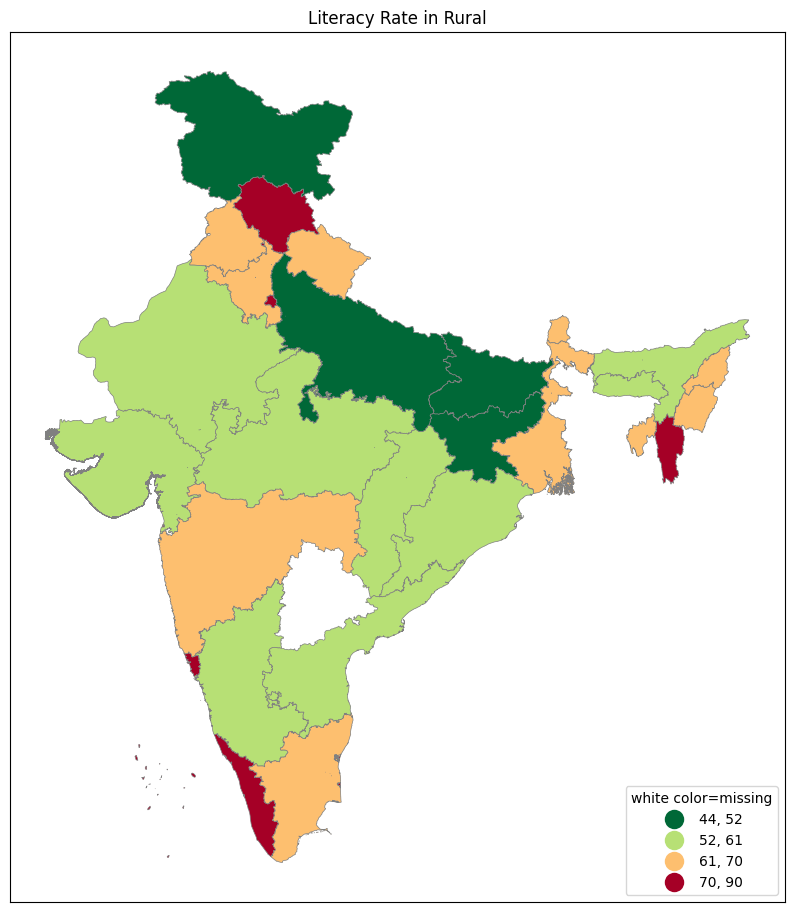

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
Literacy_df.plot(ax=ax,column='Literacy Rural',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Literacy Rate in Rural")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

<Axes: >

[]

[]

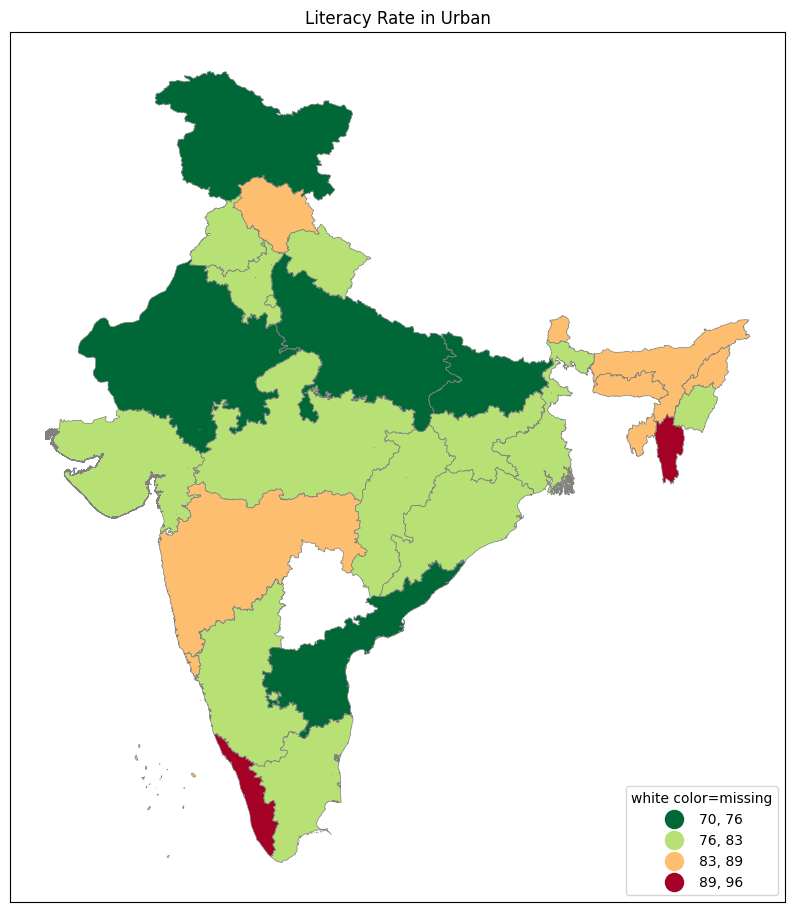

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
Literacy_df.plot(ax=ax,column='Literacy Urban',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=4, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Literacy Rate in Urban")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

<Axes: >

[]

[]

<Axes: >

[]

[]

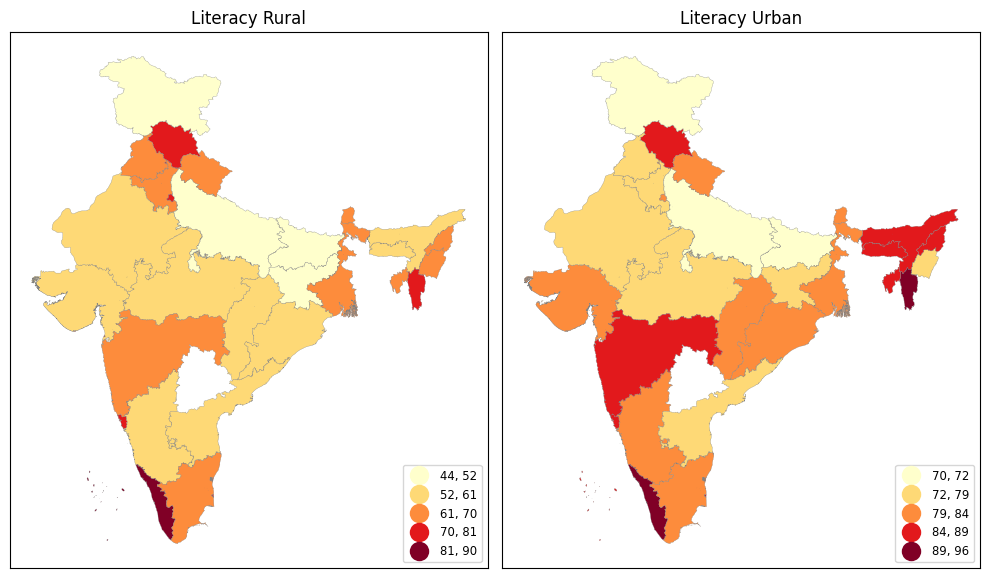

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
Literacy_df.plot(ax=axs[0],column='Literacy Rural',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Literacy Rural")
axs[0].set_xticks([]); axs[0].set_yticks([])

Literacy_df.plot(ax=axs[1],column='Literacy Urban',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Literacy Urban")
axs[1].set_xticks([]); axs[1].set_yticks([])

By the map we can infer literacy rate is higher in urban compared to rural areas

###JOIN 3

In [ ]:
! wget -q -O income_df.csv "https://drive.google.com/uc?id=106qcBt1kvyzv7zbNLWdxhd0eeTHI1Iy-"

In [ ]:
df_income_pov = pd.read_csv("income_df.csv")

In [ ]:
df_income_pov.head()

,State,2000-01-INC,2019 INC,2001 - LIT,2019 - LIT,2001 - POP,2019 - POV,2001 -SEX_Ratio,2019 -SEX_Ratio,2001 -UNEMP,2019 -UNEMP,2001 -Poverty,2019 -Poverty
0,Andaman and Nicobar Islands,25047,89642,81.30,86.63,356,381,846,876,34,54,20.99,1.00
1,Andhra Pradesh,17195,64773,60.47,67.02,76210,84581,978,993,8,12,15.77,9.20
2,Arunachal Pradesh,15260,71366,54.34,65.39,1098,1384,893,938,5,17,33.47,34.67
3,Assam,12803,36320,63.25,72.19,26656,31206,935,958,39,45,36.09,31.98
4,Bihar,6415,22582,47.00,61.80,82999,104099,919,918,18,32,42.60,33.74


Rename Jammu and kashmir to Jammu & Kashmir

In [ ]:
import pandas as pd
df_income_pov = df_income_pov.drop(df_income_pov[df_income_pov['State'] == 'Jammu & Kashmir'].index)

# Reset the index after dropping rows
df_income_pov.reset_index(drop=True, inplace=True)

# Display the DataFrame after dropping rows
print(df_income_pov)


                          State  2000-01-INC  2019 INC  2001 - LIT  \
0   Andaman and Nicobar Islands        25047     89642       81.30   
1                Andhra Pradesh        17195     64773       60.47   
2             Arunachal Pradesh        15260     71366       54.34   
3                         Assam        12803     36320       63.25   
4                         Bihar         6415     22582       47.00   
5                    Chandigarh        49771    136883       81.94   
6                  Chhattisgarh        10744     48366       64.66   
7                         Delhi        40678    161446       57.63   
8                           Goa        43735    211570       78.18   
9                       Gujarat        18392     85979       81.67   
10                      Haryana        25583    106320       82.01   
11             Himachal Pradesh        22795     75185       69.14   
12            Jammu and Kashmir        14268     46734       67.91   
13                  

In [ ]:
df_income_pov['State'] = df_income_pov['State'].replace('Jammu and Kashmir', 'Jammu & Kashmir')

print(df_income_pov)


                          State  2000-01-INC  2019 INC  2001 - LIT  \
0   Andaman and Nicobar Islands        25047     89642       81.30   
1                Andhra Pradesh        17195     64773       60.47   
2             Arunachal Pradesh        15260     71366       54.34   
3                         Assam        12803     36320       63.25   
4                         Bihar         6415     22582       47.00   
5                    Chandigarh        49771    136883       81.94   
6                  Chhattisgarh        10744     48366       64.66   
7                         Delhi        40678    161446       57.63   
8                           Goa        43735    211570       78.18   
9                       Gujarat        18392     85979       81.67   
10                      Haryana        25583    106320       82.01   
11             Himachal Pradesh        22795     75185       69.14   
12              Jammu & Kashmir        14268     46734       67.91   
13                  

In [ ]:
df_inc = pd.merge(Ind, df_income_pov, on='State',how='outer',indicator=True)

In [ ]:
df_Inc_2 = pd.merge(Ind, df_income_pov, on='State',how='inner',indicator=False)

In [ ]:
df_inc.dtypes

State                object
geometry           geometry
2000-01-INC         float64
2019 INC            float64
2001 - LIT          float64
2019 - LIT          float64
2001 - POP          float64
2019 - POV          float64
2001 -SEX_Ratio     float64
2019 -SEX_Ratio     float64
2001 -UNEMP         float64
2019 -UNEMP         float64
2001 -Poverty       float64
2019 -Poverty       float64
_merge             category
dtype: object

In [ ]:
df_inc = df_inc[['State','2019 - LIT','2019 -Poverty','_merge','geometry','2019 INC','2019 - POV']]

In [ ]:
df_inc.dtypes

State              object
2019 - LIT        float64
2019 -Poverty     float64
_merge           category
geometry         geometry
2019 INC          float64
2019 - POV        float64
dtype: object

In [ ]:
import pandas as pd

print(df_inc['State'])


0        Andaman & Nicobar Island
1              Arunanchal Pradesh
2                           Assam
3                           Bihar
4                      Chandigarh
5                    Chhattisgarh
6          Dadara & Nagar Havelli
7                     Daman & Diu
8                             Goa
9                         Gujarat
10                        Haryana
11               Himachal Pradesh
12                Jammu & Kashmir
13                      Jharkhand
14                      Karnataka
15                         Kerala
16                    Lakshadweep
17                 Madhya Pradesh
18                    Maharashtra
19                        Manipur
20                      Meghalaya
21                        Mizoram
22                       Nagaland
23                   NCT of Delhi
24                     Puducherry
25                         Punjab
26                      Rajasthan
27                         Sikkim
28                     Tamil Nadu
29            

<Axes: >

[]

[]

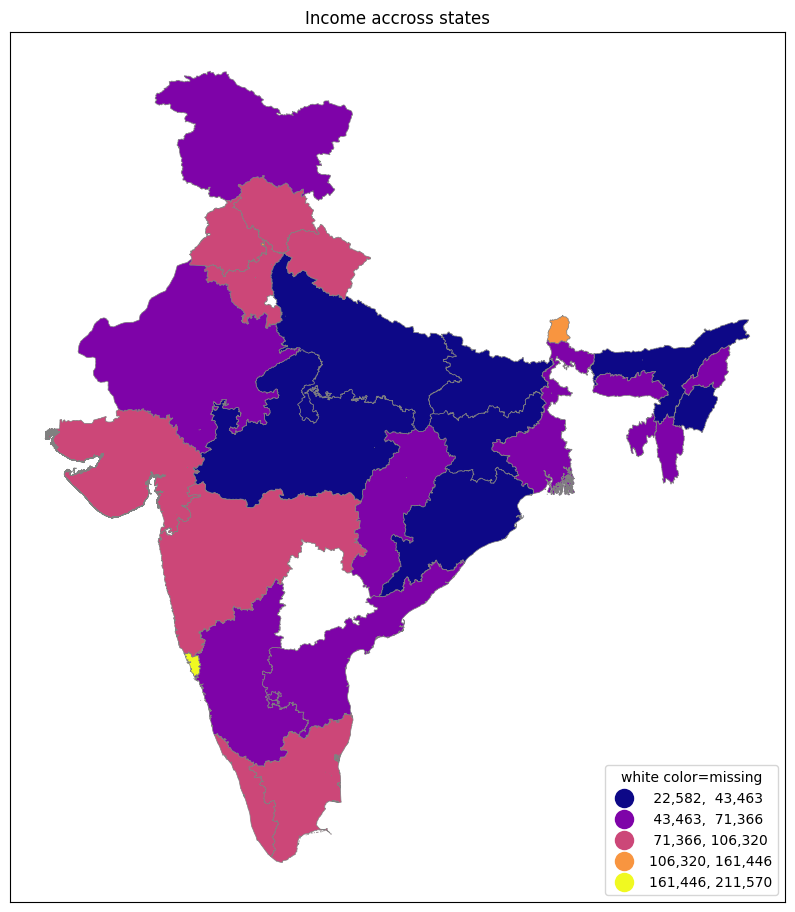

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
df_inc.plot(ax=ax,column='2019 INC',legend=True,cmap='plasma',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Income accross states")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

### Centroid - analysing two specific states
1) Lowest literacy and highest unemployment


In [ ]:
#1
Lit_df_2 = Literacy_df.copy()
Lit_df_2["geometry"] = Lit_df_2["geometry"].centroid

<ipython-input-69-3b9ff8855cb1>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Lit_df_2["geometry"] = Lit_df_2["geometry"].centroid


In [ ]:
State_1=Ind.query("State=='Jharkhand'")

<Axes: >

[]

[]

<Axes: >

<Axes: title={'center': 'Literacy rate'}>

'\n/   - diagonal hatching\n\\   - back diagonal\n|   - vertical\n-   - horizontal\n+   - crossed\nx   - crossed diagonal\no   - small circle\nO   - large circle\n.   - dots\n*   - stars\n'

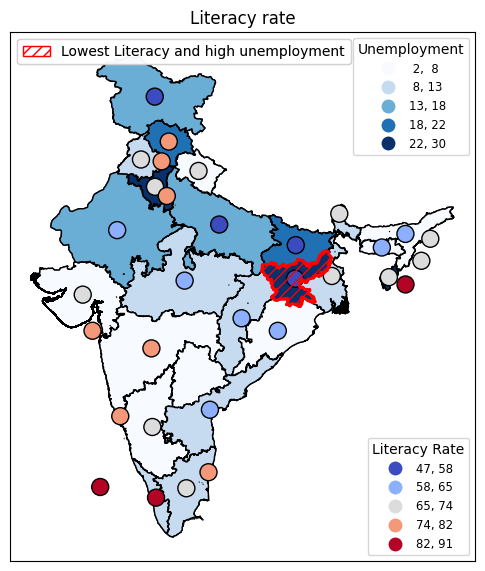

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,14))
df_1.plot(ax=ax,column=' Estimated Unemployment Rate (%)',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1})

l1 = ax.get_legend()
l1.set_title('''Unemployment''')
ax.set_xticks([]); ax.set_yticks([])

ax.add_artist(l1)
Lit_df_2.plot(ax=ax,column='Literacy_rate',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1},
         markersize = 150)


ax.title.set_text("Literacy rate")
l2 = ax.get_legend()
l2.set_title('''Literacy rate''')

State_1.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''Literacy Rate''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'Lowest Literacy and high unemployment')
l2=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l2)
ax.add_artist(l1)

#2 Low literacy and low income

In [ ]:
import pandas as pd

min_value = Literacy_df['Literacy_rate'].min()

print("The minimum value in the column 'lit_rate' is:", min_value)


The minimum value in the column 'lit_rate' is: 47.0


In [ ]:
import pandas as pd

# Assuming you have a DataFrame called Literacy_df
# Replace 'Literacy_df' with the actual DataFrame name

# Filter rows where 'Literacy_rate' is 47.0
filtered_rows = Literacy_df[Literacy_df['Literacy_rate'] == 47.0]

# Extract the 'State' column from the filtered rows
states_with_47_literacy_rate = filtered_rows['State']

# Display the 'State' values where 'Literacy_rate' is 47.0
print(states_with_47_literacy_rate)


3    Bihar
Name: State, dtype: object


In [ ]:
State_2=Ind.query("State=='Bihar'")

<Axes: >

[]

[]

<Axes: >

<Axes: title={'center': 'Literacy rate'}>

'\n/   - diagonal hatching\n\\   - back diagonal\n|   - vertical\n-   - horizontal\n+   - crossed\nx   - crossed diagonal\no   - small circle\nO   - large circle\n.   - dots\n*   - stars\n'

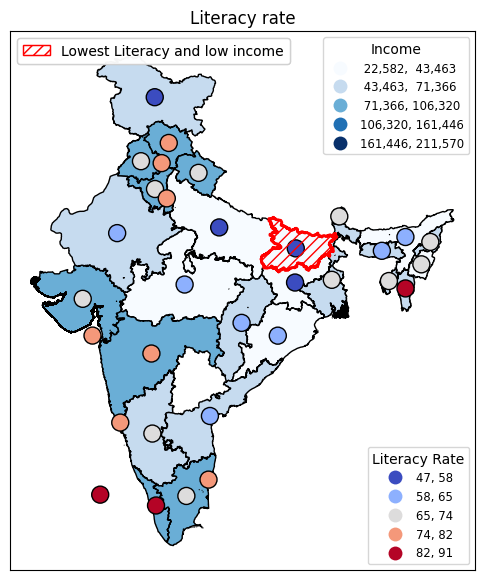

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,14))
df_inc.plot(ax=ax,column='2019 INC',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1})

l1 = ax.get_legend()
l1.set_title('''Income''')
ax.set_xticks([]); ax.set_yticks([])

ax.add_artist(l1)
Lit_df_2.plot(ax=ax,column='Literacy_rate',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1},
         markersize = 150)


ax.title.set_text("Literacy rate")
l2 = ax.get_legend()
l2.set_title('''Literacy rate''')

State_2.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''Literacy Rate''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'Lowest Literacy and low income')
l2=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l2)
ax.add_artist(l1)

###Other Visualisations###

In [ ]:
#let us start with some basic imports

# for data Analysis

import numpy as np
import pandas as pd

# for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# k-means for cluster
from sklearn.cluster import KMeans

%matplotlib inline


### Line plot between income and literacy rate ###

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Normalize the data
df_inc['2019 INC'] = (df_inc['2019 INC'] - df_inc['2019 INC'].min()) / (df_inc['2019 INC'].max() - df_inc['2019 INC'].min())
df_inc['2019 - LIT'] = (df_inc['2019 - LIT'] - df_inc['2019 - LIT'].min()) / (df_inc['2019 - LIT'].max() - df_inc['2019 - LIT'].min())

# Plotting the line chart
fig = go.Figure()

# Add lines for income and literacy rate
fig.add_trace(go.Scatter(x=df_inc['State'], y=df_inc['2019 INC'], mode='lines', name='Income', line=dict(color='#53D1BA')))
fig.add_trace(go.Scatter(x=df_inc['State'], y=df_inc['2019 - LIT'], mode='lines', name='Literacy Rate', line=dict(color='#D11E5D')))

# Update layout
fig.update_layout(
    title='India State Income vs Literacy rate in 2019',
    xaxis=dict(title='States in India'),
    yaxis=dict(title='Normalized Value'),
    yaxis2=dict(title='Normalized Literacy Rate', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.15, orientation='h'),
    template='plotly_dark'
)

fig.show()


### Pie Chart for unemployment accross states

In [ ]:
df_1.dtypes

State                                 object
 Estimated Unemployment Rate (%)     float64
Area                                  object
_merge                              category
geometry                            geometry
dtype: object

In [ ]:
import plotly.express as px
import pandas as pd
fig = px.pie(
    df_1,
    names='State',  # Categories (states) for the pie chart
    values=' Estimated Unemployment Rate (%)',  # Values based on estimated unemployment rates
    title='Unemployment Rate Distribution by State',
    hover_data=[' Estimated Unemployment Rate (%)'],  # Data to display on hover
)

fig.show()

BASEMAP

In [ ]:
! pip install contextily
import contextily as cx

In [ ]:
Ind = Ind.to_crs(epsg=3857)

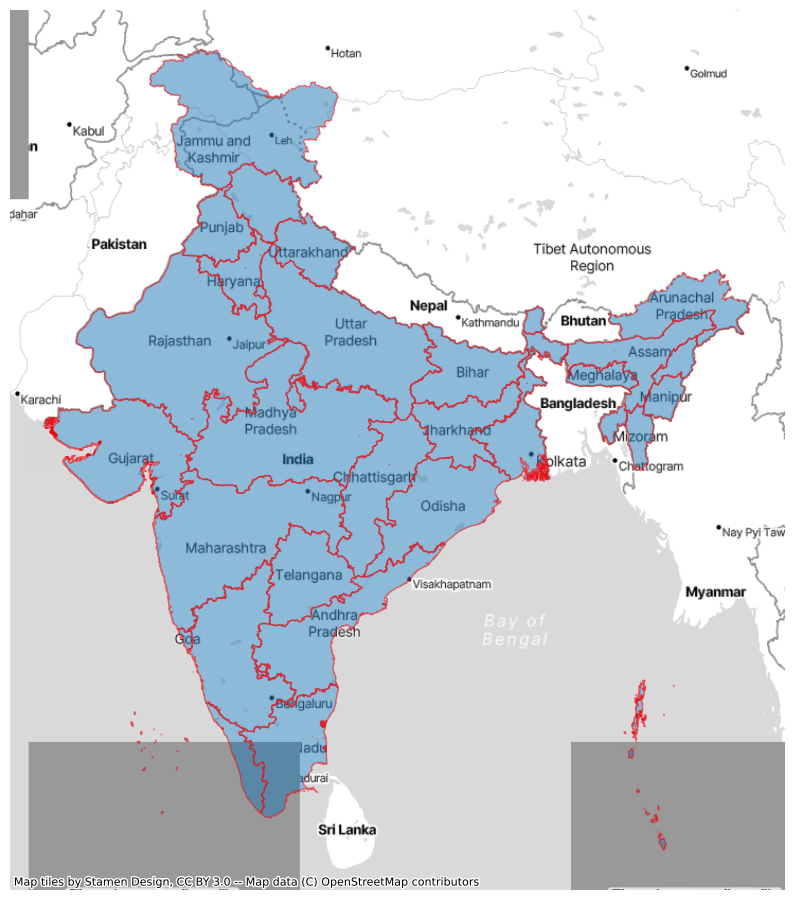

In [ ]:

ax = Ind.plot(figsize=(10, 20), alpha=0.5, edgecolor="red")
#cx.add_basemap(ax)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
#cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor)
ax.set_axis_off()

### Inference ###

By plotting both the maps we were able to discover correlation between literacy rate and unemployment. Majority of States with higher literacy has a lower unemployment rate.